In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as skpreprocessing
from preprocessing import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
cmap = plt.get_cmap("bwr")
cmap.set_bad("white")

# Chargement des données (avec suppression)

x, y = preprocessing("data.csv", threshold=.4)

In [15]:
x, y = preprocessing("data.csv", threshold=1.0, remove_nones=False, nelement=1000, return_x_y=True)

# Pandas Profiling

In [ ]:
input()
import pandas_profiling as pp
pp.ProfileReport(x[:10])

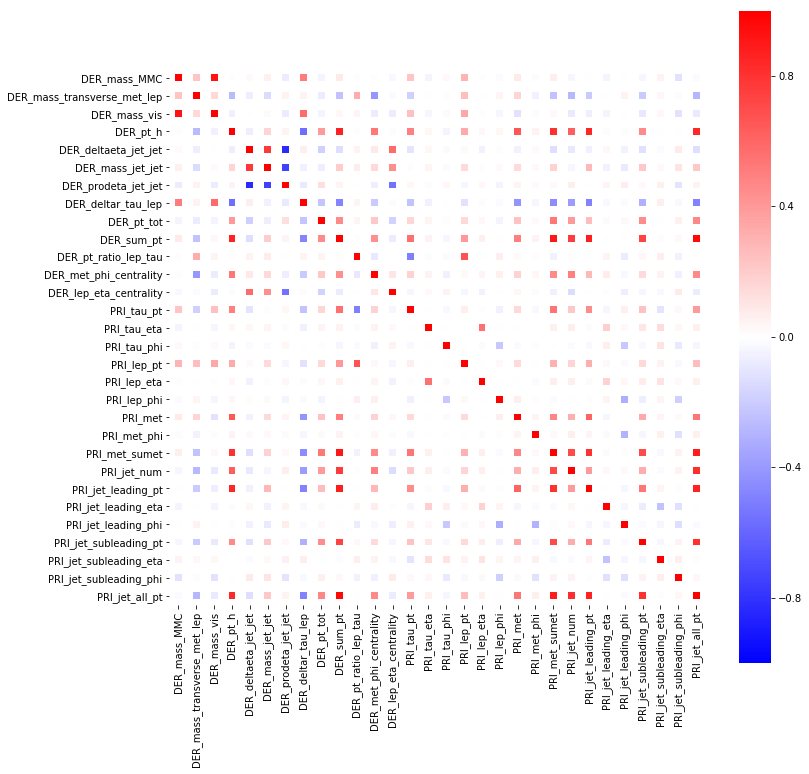

In [17]:
plt.figure(figsize=((12, 12)))
_ = sns.heatmap(x.corr(), vmin=-1, vmax=1, cmap=cmap, linewidths=10, square=True)

# Transformation des données
#### 1 - Application du log sur les données suivant une distribution exponentielle décroissante pour obtenir ici des données suivant une loi normale.
#### 2 - Scale pour obtenir des données centrées réduites

In [4]:
cols = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_pt_ratio_lep_tau", "DER_pt_tot",
       "DER_sum_pt", "PRI_jet_all_pt", "PRI_lep_pt", "PRI_met", "PRI_met_sumet", "PRI_tau_pt"]
x_log = x.copy()
x_log[cols] = np.log10(x_log[cols] - np.min(x_log[cols], axis=0) + 1)

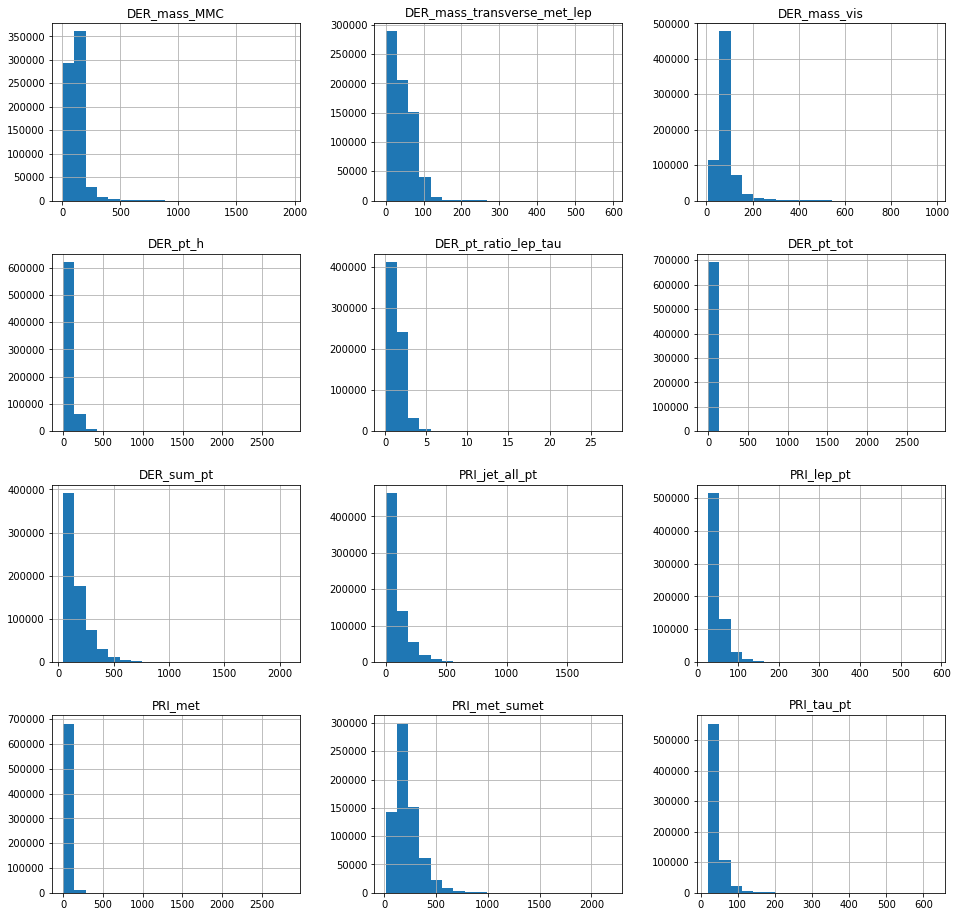

In [5]:
_ = x[cols].hist(figsize=((16, 16)), bins=20)

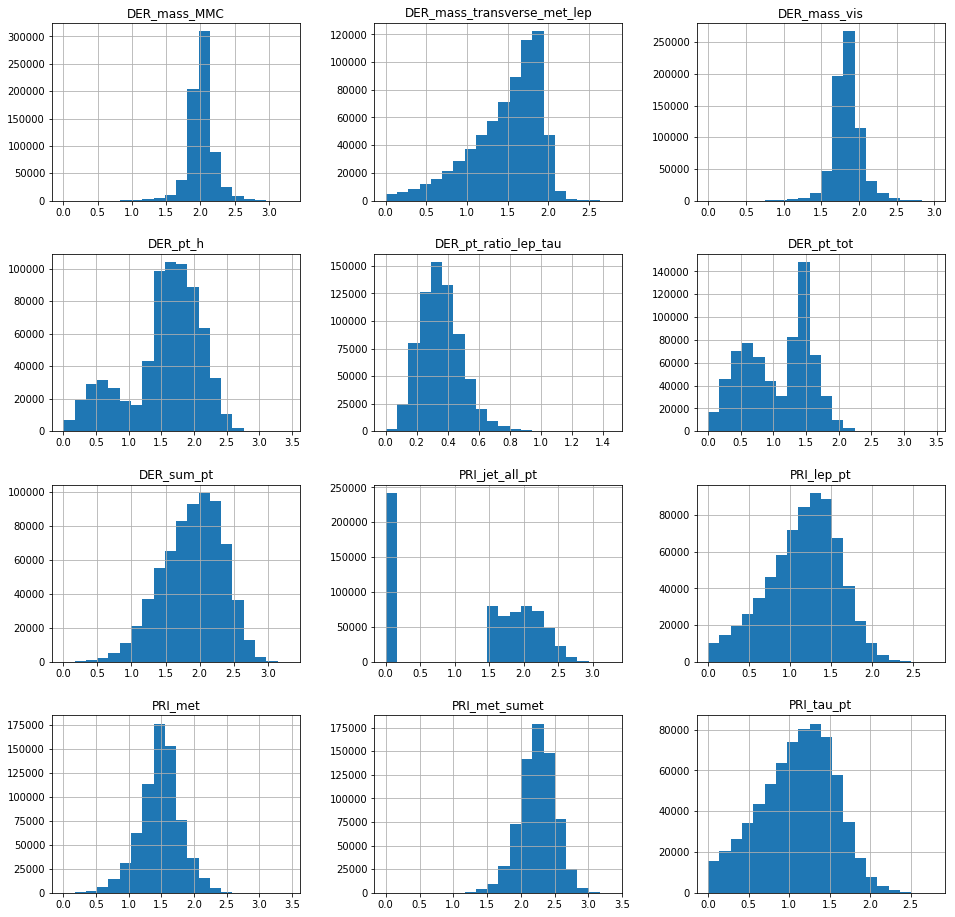

In [6]:
_ = x_log[cols].hist(figsize=((16, 16)), bins=20)

In [4]:
x_scaled = skpreprocessing.scale(x_log)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


# Corrélations

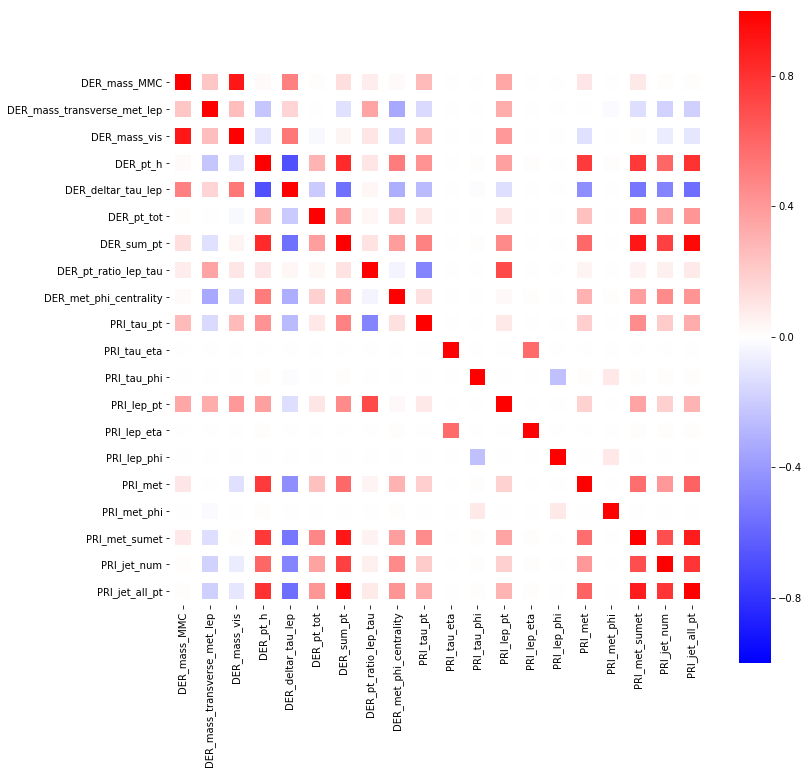

In [7]:
plt.figure(figsize=((12, 12)))
_ = sns.heatmap(x.corr(), vmin=-1, vmax=1, cmap=cmap, linewidths=10, square=True)

In [8]:
x_corr = x.corr()
x_corr = x_corr[(np.abs(x_corr) > .61) & (x_corr!=1)]
x_corr = [(ind, val) for ind, val in np.ndenumerate(x_corr) if not np.isnan(val) and ind[0]<ind[1]]
for (i, j), val in sorted(x_corr, key=lambda x:abs(x[1]), reverse=True):
    print(str(x.columns[i]).ljust(20), str(x.columns[j]).ljust(20), "%.2f" % val)

DER_sum_pt           PRI_jet_all_pt       0.97
DER_mass_MMC         DER_mass_vis         0.91
DER_sum_pt           PRI_met_sumet        0.91
PRI_met_sumet        PRI_jet_all_pt       0.89
DER_pt_h             DER_sum_pt           0.83
DER_pt_h             PRI_jet_all_pt       0.80
PRI_jet_num          PRI_jet_all_pt       0.79
DER_pt_h             PRI_met_sumet        0.78
DER_pt_h             PRI_met              0.77
DER_sum_pt           PRI_jet_num          0.74
DER_pt_ratio_lep_tau PRI_lep_pt           0.71
PRI_met_sumet        PRI_jet_num          0.69
DER_pt_h             DER_deltar_tau_lep   -0.68
PRI_met              PRI_jet_all_pt       0.61


In [12]:
mask = (np.abs(x_corr.values)<.65) | (corr.values==1)
mask[np.tril_indices(x_corr.shape[0])] = True
plt.figure(figsize=((10, 10)))
_ = sns.heatmap(x_corr, cmap=cmap, mask=mask, vmin=-1, vmax=1, linewidths=1, cbar=False,
                square=True, annot=True, annot_kws={"size": 10}, fmt='.2f')

AttributeError: 'list' object has no attribute 'values'

In [5]:
n_comp_ini = len(x.columns)
pca = PCA(n_components=n_comp_ini)
x_pca = pca.fit_transform(x_scaled)

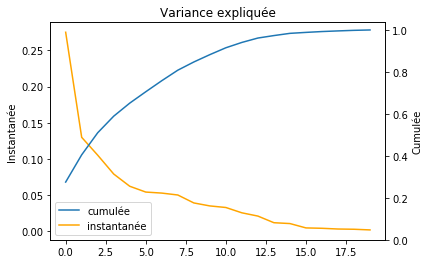

nb component: 20
instant [0.27514875 0.12983594 0.10514165 0.07906758 0.06216437 0.05413831
 0.05271871 0.0500884  0.03909808 0.03496724 0.03279356 0.025442
 0.02092743 0.01175201 0.01058186 0.00455642 0.00404421 0.00303541
 0.00270579 0.00179227]
cumul [0.27514875 0.4049847  0.51012634 0.58919392 0.65135829 0.7054966
 0.75821531 0.80830371 0.84740179 0.88236903 0.91516259 0.94060459
 0.96153202 0.97328404 0.98386589 0.98842231 0.99246652 0.99550193
 0.99820773 1.        ]


In [6]:
l1 = pca.explained_variance_ratio_
l2 = np.cumsum(l1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lns1 = ax1.plot(l1, label="instantanée", color='orange')
lns2 = ax2.plot(l2, label="cumulée")
ax2.set_ylim(bottom=0)
ax1.set_title('Variance expliquée')
ax1.set_ylabel('Instantanée')
ax2.set_ylabel('Cumulée')
leg = lns2 + lns1 
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=3)
plt.show()
print("nb component:", n_comp_ini)
print("instant", l1)
print("cumul", l2)